In [1]:
# importing necessary modules and methods
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the data
df=pd.read_csv("creditcardcsvpresent.csv")
df

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,NaN,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,6661273532,NaN,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,6661273533,NaN,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,6661273532,NaN,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


In [5]:
# removing irrelevant column before training the model
df= df.drop("Merchant_id",axis=1) 
df

,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...,...
3070,NaN,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,NaN,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,NaN,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,NaN,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


In [7]:
# removing irrelevant column before training the model
df= df.drop("Transaction date",axis=1)
df

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


# EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
df.head() # first 5

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [11]:
df.shape # number of (rows,columns)

(3075, 10)

In [13]:
df.columns # column names

Index(['Average Amount/transaction/day', 'Transaction_amount', 'Is declined',
       'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Amount/transaction/day  3075 non-null   float64
 1   Transaction_amount              3075 non-null   float64
 2   Is declined                     3075 non-null   object 
 3   Total Number of declines/day    3075 non-null   int64  
 4   isForeignTransaction            3075 non-null   object 
 5   isHighRiskCountry               3075 non-null   object 
 6   Daily_chargeback_avg_amt        3075 non-null   int64  
 7   6_month_avg_chbk_amt            3075 non-null   float64
 8   6-month_chbk_freq               3075 non-null   int64  
 9   isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 240.4+ KB


In [17]:
df.describe() # statistical information about the dataset

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [19]:
# checking for duplicate values
df.duplicated().sum()

1

In [21]:
# droping the duplicate values
df=df.drop_duplicates()

In [23]:
# checking if the the duplicate values are removed or not
df.duplicated().sum()

0

In [25]:
# checking for null values
df.isnull().sum()

Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [27]:
# loading the label encoders into different variables 
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()

In [29]:
# using label encoders in columns to convert text into categorical numerical values [0,1,2...etc]
df["Is declined"]=le1.fit_transform(df["Is declined"])
df["isForeignTransaction"]=le2.fit_transform(df["isForeignTransaction"])
df["isHighRiskCountry"]=le3.fit_transform(df["isHighRiskCountry"])
df["isFradulent"]=le4.fit_transform(df["isFradulent"])
df

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,500.0,26000.0,0,0,1,1,800,677.2,6,1
...,...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,0,0,754,585.0,7,0
3071,800.0,0.0,1,0,0,0,754,585.0,7,0
3072,800.0,20800.0,1,0,0,0,754,585.0,7,0
3073,1500.0,12000.0,1,0,1,1,754,585.0,7,0


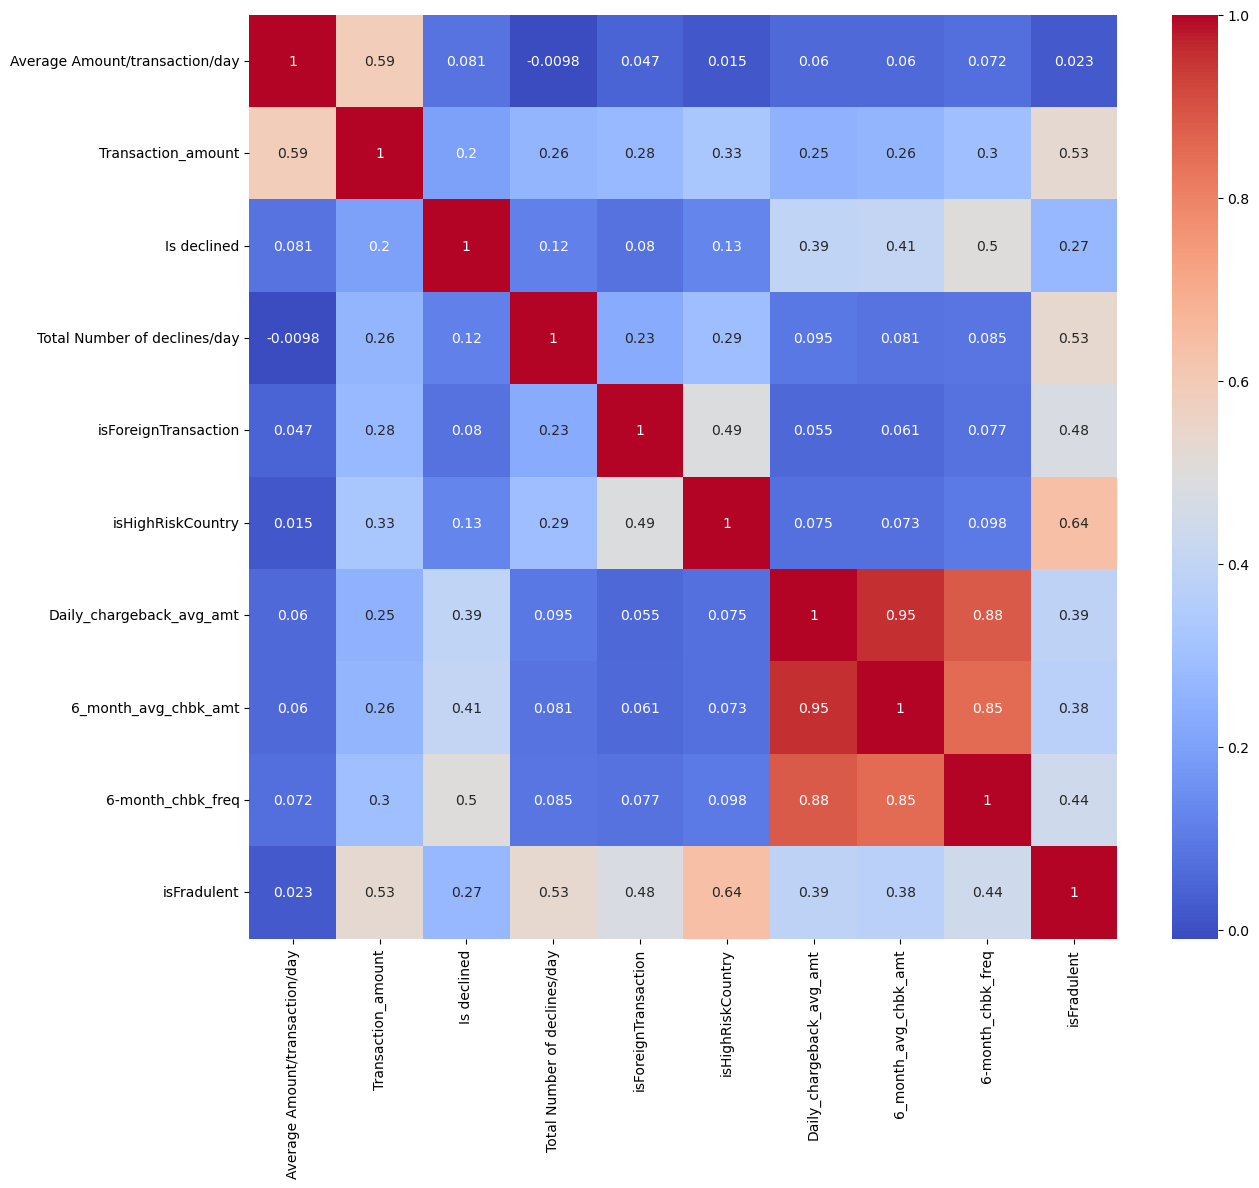

In [31]:
# plotting the data in heatmaps using matplotlib and seaborn
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [33]:
x=df.drop("isFradulent",axis=1) # features
x

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,100.0,3000.0,0,5,1,1,0,0.0,0
1,100.0,4300.0,0,5,1,1,0,0.0,0
2,185.5,4823.0,1,5,0,0,0,0.0,0
3,185.5,5008.5,1,8,0,0,0,0.0,0
4,500.0,26000.0,0,0,1,1,800,677.2,6
...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,0,0,754,585.0,7
3071,800.0,0.0,1,0,0,0,754,585.0,7
3072,800.0,20800.0,1,0,0,0,754,585.0,7
3073,1500.0,12000.0,1,0,1,1,754,585.0,7


In [35]:
y=df.isFradulent # target
y

0       1
1       1
2       1
3       1
4       1
       ..
3070    0
3071    0
3072    0
3073    0
3074    0
Name: isFradulent, Length: 3074, dtype: int32

## SPLITING DATA INTO TRAINING AND TESTING DATA 

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## LOGISTIC REGRESSION

In [41]:
lr_model = LogisticRegression()

# Training the model
lr_model.fit(x_train,y_train)

LogisticRegression()

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming lr_model_y_pred is the predicted values from the model
lr_model_y_pred = lr_model.predict(x_test)

print("LOGISTIC REGRESSION")
print(f"Training Accuracy : {lr_model.score(x_train,y_train)*100}")
print("Testing Accuracy : ", lr_model.score(x_test, y_test) * 100)
print("Precision Score : ", precision_score(y_test, lr_model_y_pred) * 100)
print("Recall Score : ", recall_score(y_test, lr_model_y_pred) * 100)
print("F1 Score : ", f1_score(y_test, lr_model_y_pred) * 100)


LOGISTIC REGRESSION
Training Accuracy : 98.77999186661245
Testing Accuracy :  99.02439024390245
Precision Score :  97.67441860465115
Recall Score :  95.45454545454545
F1 Score :  96.55172413793103


## DECISION TREE CLASSIFIER

In [46]:
dtc_model = DecisionTreeClassifier()

# Training the model
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming dtc_model_y_pred is the predicted values from the model
dtc_model_y_pred = dtc_model.predict(x_test)

print("DEECISION TREE CLASSIFIER")
print(f"Training Accuracy : {dtc_model.score(x_train,y_train)*100}")
print("Testing Accuracy  : ", dtc_model.score(x_test, y_test) * 100)
print("Precision Score : ", precision_score(y_test, dtc_model_y_pred) * 100)
print("Recall Score : ", recall_score(y_test, dtc_model_y_pred) * 100)
print("F1 Score : ", f1_score(y_test, dtc_model_y_pred) * 100)


DEECISION TREE CLASSIFIER
Training Accuracy : 100.0
Testing Accuracy  :  98.53658536585365
Precision Score :  96.47058823529412
Recall Score :  93.18181818181817
F1 Score :  94.79768786127167


## RANDOM FOREST CLASSIFIER

In [51]:
rfc_model = RandomForestClassifier(n_estimators=100)

# Training the model
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming rfc_model_y_pred is the predicted values from the model
rfc_model_y_pred = rfc_model.predict(x_test)

print("RANDOM FOREST CLASSIFIER")
print(f"Training Accuracy : {rfc_model.score(x_train,y_train)*100}")
print("Testing Accuracy : ", rfc_model.score(x_test, y_test) * 100)
print("Precision Score : ", precision_score(y_test, rfc_model_y_pred) * 100)
print("Recall Score : ", recall_score(y_test, rfc_model_y_pred) * 100)
print("F1 Score : ", f1_score(y_test, rfc_model_y_pred) * 100)


RANDOM FOREST CLASSIFIER
Training Accuracy : 100.0
Testing Accuracy :  99.02439024390245
Precision Score :  97.67441860465115
Recall Score :  95.45454545454545
F1 Score :  96.55172413793103


## K NEAREST NEIGHBOR CLASSIFIER

In [62]:
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming knn_model_y_pred is the predicted values from the model
knn_model_y_pred = knn_model.predict(x_test)

print("KNN CLASSIFIER")
print(f"Training Accuracy : {knn_model.score(x_train,y_train)*100}")
print("Testing Accuracy : ", knn_model.score(x_test, y_test) * 100)
print("Precision Score : ", precision_score(y_test, knn_model_y_pred) * 100)
print("Recall Score : ", recall_score(y_test, knn_model_y_pred) * 100)
print("F1 Score : ", f1_score(y_test, knn_model_y_pred) * 100)


KNN CLASSIFIER
Training Accuracy : 98.49532330215534
Testing Accuracy :  98.86178861788618
Precision Score :  96.55172413793103
Recall Score :  95.45454545454545
F1 Score :  96.0


## SUPPORT VECTOR CLASSIFIER (SVC)

# ADABOOST BOOSTING ALGORITHM

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
abc_model = AdaBoostClassifier(n_estimators = 25, learning_rate = 0.3)

# Trainning the model
abc_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=25)

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming abc_model_y_pred is the predicted values from the model
abc_model_y_pred = abc_model.predict(x_test)

print("ADA BOOST CLASSIFIER")
print(f"Training Accuracy : {abc_model.score(x_train,y_train)*100}")
print("Testing Accuracy : ", abc_model.score(x_test, y_test) * 100)
print("Precision Score : ", precision_score(y_test, abc_model_y_pred) * 100)
print("Recall Score : ", recall_score(y_test, abc_model_y_pred) * 100)
print("F1 Score : ", f1_score(y_test, abc_model_y_pred) * 100)

ADA BOOST CLASSIFIER
Training Accuracy : 95.85197234648231
Testing Accuracy :  96.42276422764228
Precision Score :  98.52941176470588
Recall Score :  76.13636363636364
F1 Score :  85.8974358974359


# GRADIENT BOOST CLASSIFIER

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gbc_model = GradientBoostingClassifier(n_estimators = 25, learning_rate = 0.3)

# training the model
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=25)

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming gbc_model_y_pred is the predicted values from the model
gbc_model_y_pred = gbc_model.predict(x_test)

print("GRADIENT BOOST CLASSIFIER")
print(f"Training Accuracy : {gbc_model.score(x_train,y_train)*100}")
print("Testing Accuracy : ", gbc_model.score(x_test, y_test) * 100)
print("Precision Score : ", precision_score(y_test, gbc_model_y_pred) * 100)
print("Recall Score : ", recall_score(y_test, gbc_model_y_pred) * 100)
print("F1 Score : ", f1_score(y_test, gbc_model_y_pred) * 100)

GRADIENT BOOST CLASSIFIER
Training Accuracy : 99.75599837332248
Testing Accuracy :  99.02439024390245
Precision Score :  97.67441860465115
Recall Score :  95.45454545454545
F1 Score :  96.55172413793103


### SAVING THE RANDOM FOREST CLASSIFIER ALGORITHM INTO PICKLE FILE

In [82]:

import pickle 
import os 


model_file_name = "rfc_model.pkl"
model_folder = "./models/"

# Create the directory if doesn't exist
os.makedirs(model_folder, exist_ok = True)

# save the model using pickle
with open(os.path.join(model_folder,model_file_name), "wb") as file:
    pickle.dump(rfc_model, file)

In [84]:
# load the rfr model 
with open(os.path.join(model_folder, model_file_name), "rb") as file:
    load_rfc_model = pickle.load(file)

In [88]:
import numpy as np
def predict_fraud(Average_Amount, Transaction_amount, Is_declined, Total_No_of_declines_day, ForeignTransaction, HighRiskCountry, Daily_chargeback_avg_amt, month_avg_chbk_amt, month_chbk_freq):


    with open(os.path.join(model_folder, model_file_name), "rb") as file:
        load_rfc_model = pickle.load(file)


    input_data = np.array([[Average_Amount, Transaction_amount, Is_declined, Total_No_of_declines_day, ForeignTransaction, HighRiskCountry, Daily_chargeback_avg_amt, month_avg_chbk_amt, month_chbk_freq]])
    

    scaled_data = scaler.transform(input_data)
    

    prediction = load_rfc_model.predict(scaled_data)


    final_info = f"Credit Card Status : {prediction[0]:d}"
    

    fraud_status = "FRAUDULENT" if prediction[0] == 1 else "NON-FRAUDULENT"

    return fraud_status

# user input
Merchant_ID = int(input("Merchant ID : ")) #
Average_Amount = float(input("Average Amount/Day : ")) #
Transaction_amount = float(input("Transaction Amount : ")) # 
Is_declined = int(input("Is Declined  (1 = Yes, 0 = No) : ")) # input is categorical value 0,1
Total_No_of_declines_day = int(input("Total Number of Declines per day: ")) #  
ForeignTransaction = int(input("Is Foreign Transaction, 1 = YES, 0 = NO : ")) # input is categorical value 0,1
HighRiskCountry = int(input("Is High Risk Country, 1 = YES, 0 = NO: ")) # input is categorical value 0,1
Daily_chargeback_avg_amt = int(input("Daily Chargeback Amount : ")) # 
month_avg_chbk_amt = float(input("6-Month Average Chargeback Amount")) # 
month_chbk_freq = int(input("6-Month Chargeback Frequency")) # 

print(predict_fraud(Average_Amount, Transaction_amount, Is_declined, Total_No_of_declines_day, ForeignTransaction, HighRiskCountry, Daily_chargeback_avg_amt, month_avg_chbk_amt, month_chbk_freq))

Merchant ID :  3160041996
Average Amount/Day :  185.5
Transaction Amount :  2411.5
Is Declined  (1 = Yes, 0 = No) :  1
Total Number of Declines per day:  2
Is Foreign Transaction, 1 = YES, 0 = NO :  0
Is High Risk Country, 1 = YES, 0 = NO:  0
Daily Chargeback Amount :  0
6-Month Average Chargeback Amount 0
6-Month Chargeback Frequency 0


NON-FRAUDULENT


## BUILD GRADIO USER INTERFACE

In [90]:
import gradio as gr

In [91]:
headline = " CREDIT CARD FRAUD DETECTOR" 

iface = gr.Interface(fn = predict_fraud, 
                     inputs = [
                        #gr.Number(label = "MERCHANT ID"),
                         gr.Number(label = "AVERAGE AMOUNT PER DAY"),
                         gr.Number(label = "TRANSACTION AMOUNT"),
                         gr.Radio(["No", "Yes"],label = "IS DECLINED",type ="index"),
                         gr.Number(label = "TOTAL DECLINES PER DAY"),
                         gr.Radio(["No", "Yes"],label = "IS FOREIGN TRANSACTIONS",type ="index"),
                         gr.Radio(["No", "Yes"],label = "IS HIGH-RISK COUNTRY",type ="index"),
                         gr.Number(label = "DAILY CHARGEBACK AMOUNT"),
                         gr.Number(label = "6-MONTH AVERAGE CHARGEBACK AMOUNT"),
                         gr.Number(label = "6-MONTH AVERAGE CHARGEBACK FREQUENCY")],
                     outputs = gr.Textbox(label = "STATUS"), 
                     title = headline) 
iface.launch(share = True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://000d35c845f2d08dc2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
